In [ ]:
# load in dataset

from google.colab import files
import pandas as pd

uploaded_cleaned = files.upload()

file = list(uploaded_cleaned.keys())[0]

final_df = pd.read_csv(file, encoding='ISO-8859-1')
final_df.head()

Saving cleaned_merged_tracks.csv to cleaned_merged_tracks (1).csv


,album_title,album_release_date,track_genre_top,track_listens
0,AWOL - A Way Of Life,2009-01-05 00:00:00,Hip-Hop,1293
1,AWOL - A Way Of Life,2009-01-05 00:00:00,Hip-Hop,514
2,AWOL - A Way Of Life,2009-01-05 00:00:00,Hip-Hop,1151
3,Constant Hitmaker,2008-02-06 00:00:00,Pop,50135
4,AWOL - A Way Of Life,2009-01-05 00:00:00,Hip-Hop,943


In [ ]:
final_df['album_release_date'] = pd.to_datetime(final_df['album_release_date'])

# aggregate ata by genre and date (monthly aggregation)
genre_data = final_df.groupby([pd.Grouper(key='album_release_date', freq='M'), 'track_genre_top'])['track_listens'].sum().unstack().fillna(0)

<ipython-input-19-349804bbab49>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  genre_data = final_df.groupby([pd.Grouper(key='album_release_date', freq='M'), 'track_genre_top'])['track_listens'].sum().unstack().fillna(0)


In [ ]:
# check zeros and negatives
print("Minimum value in dataset:", genre_data.min().min())
print("Any zeros?", (genre_data == 0).sum().sum())
print("Any negative values?", (genre_data < 0).sum().sum())

Minimum value in dataset: 0.0
Any zeros? 3422
Any negative values? 0


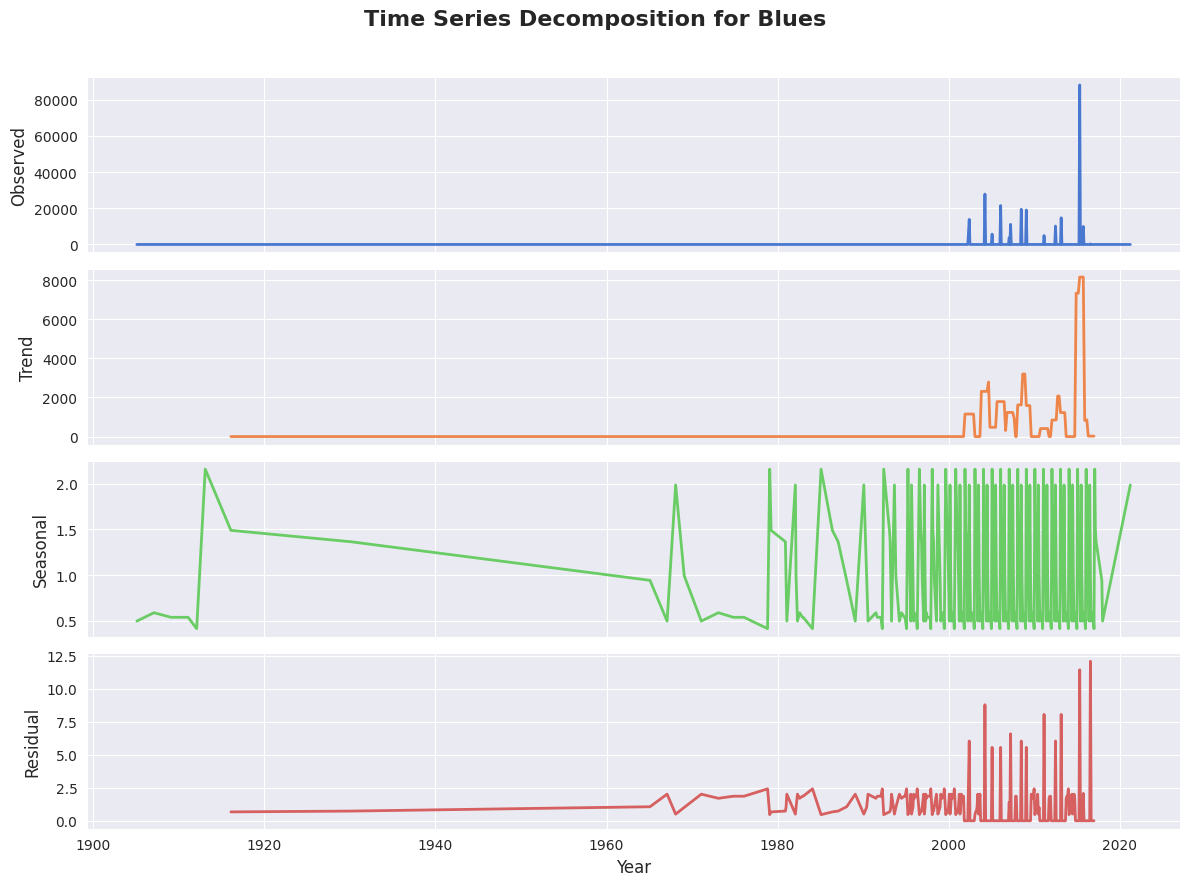

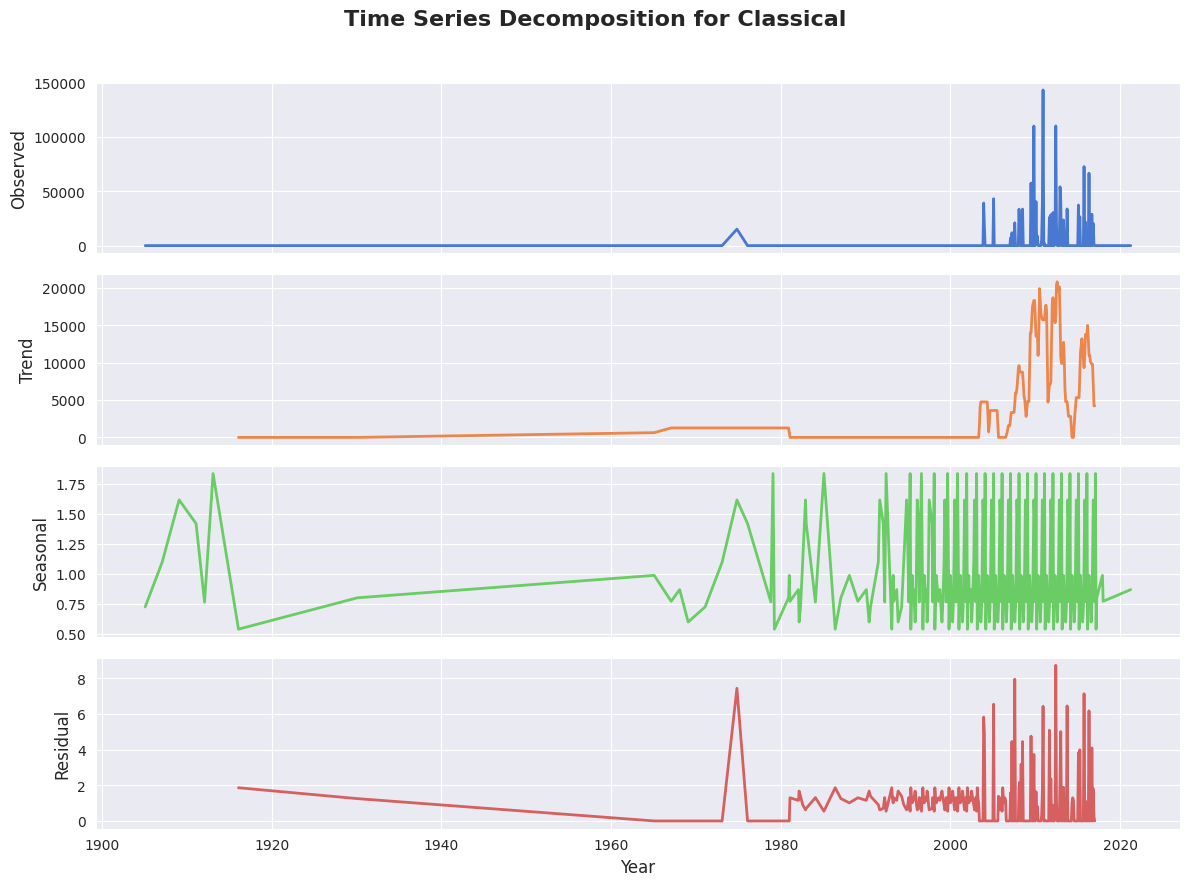

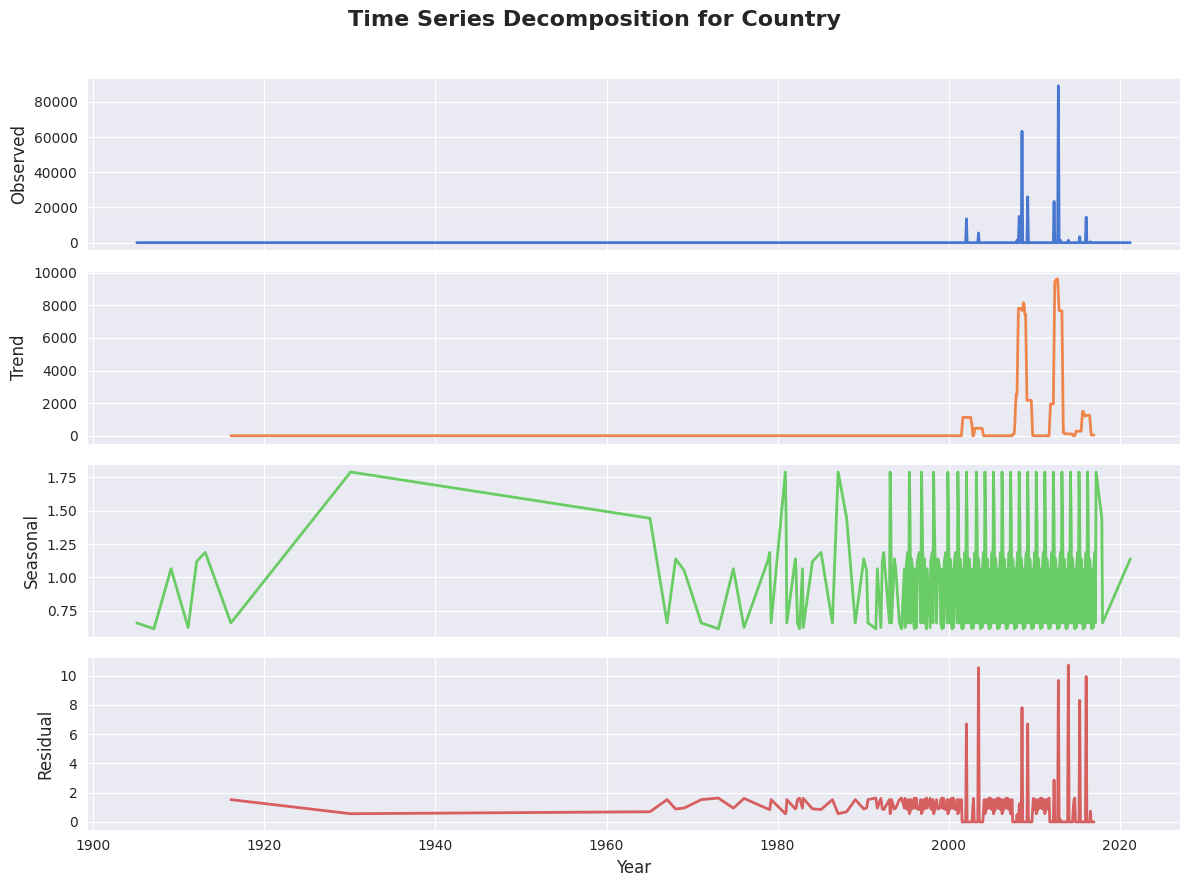

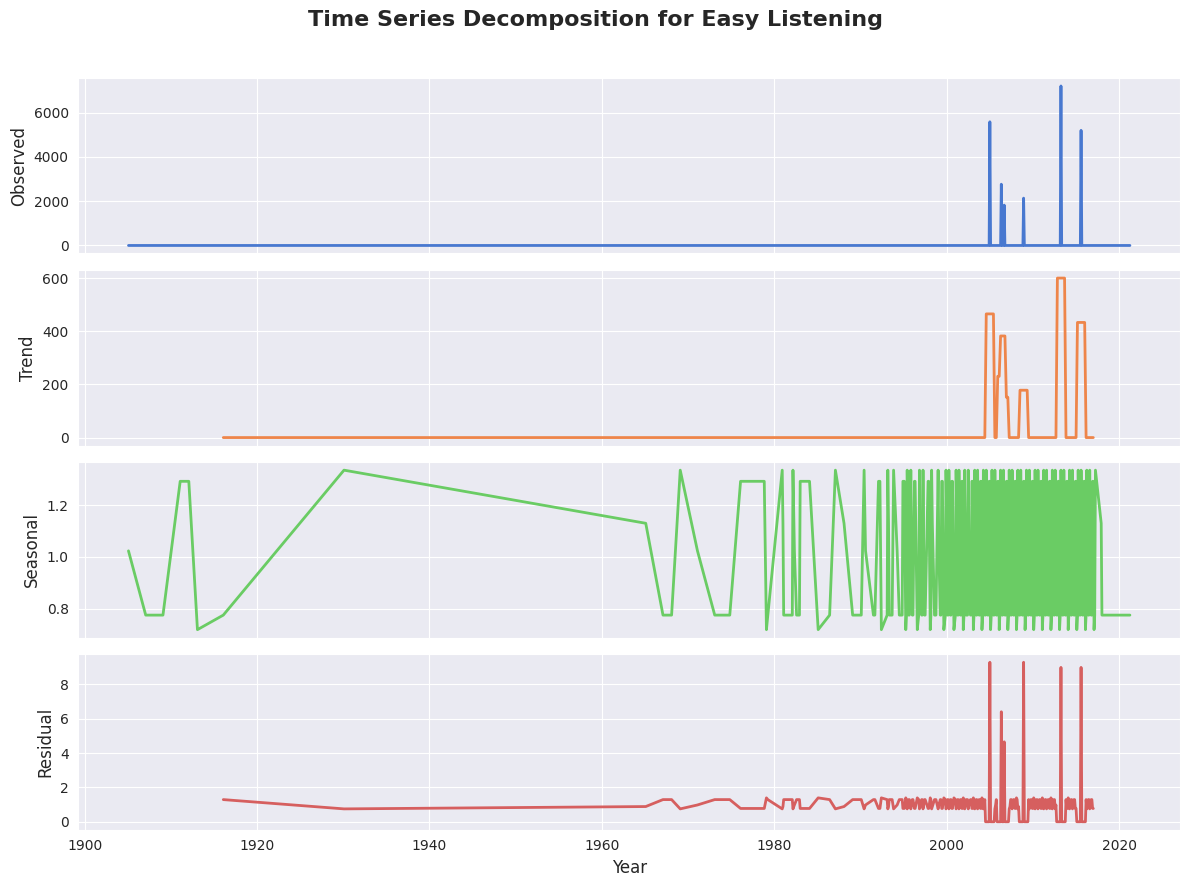

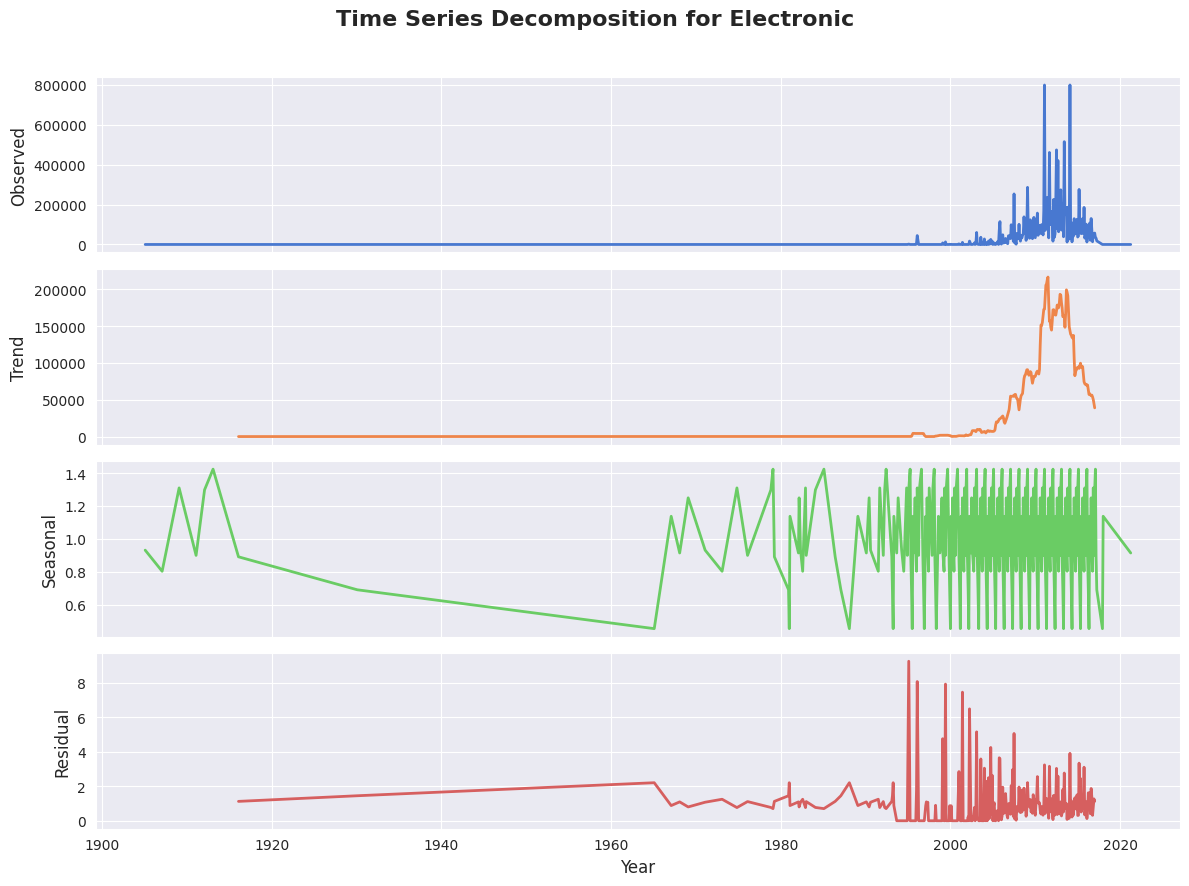

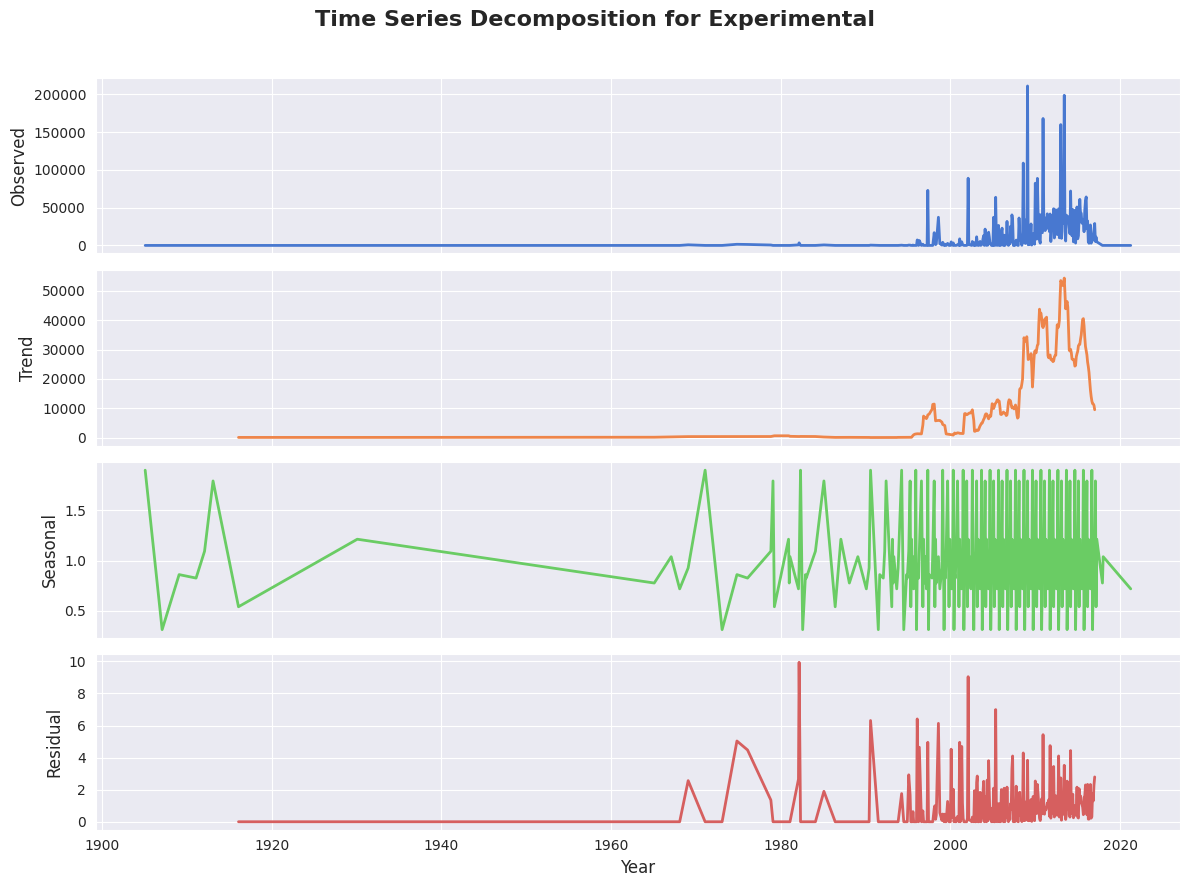

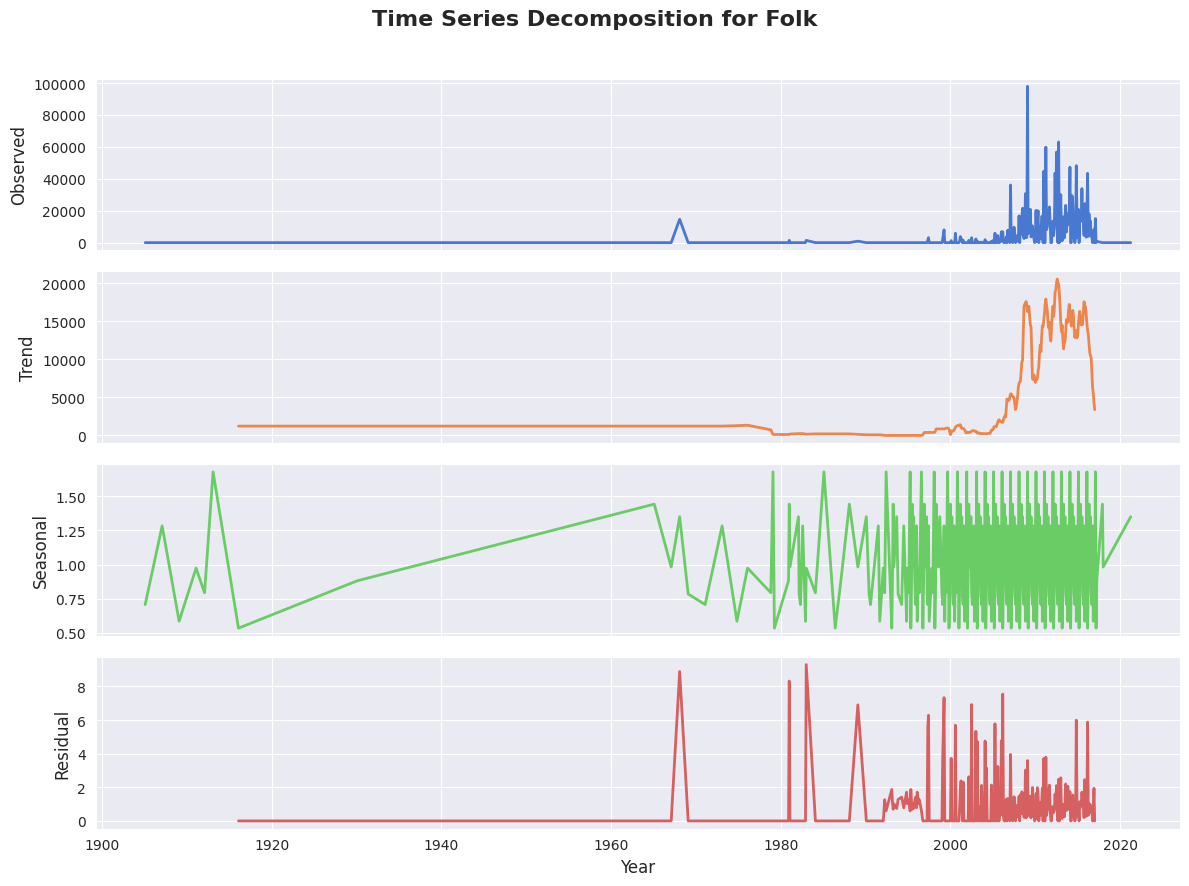

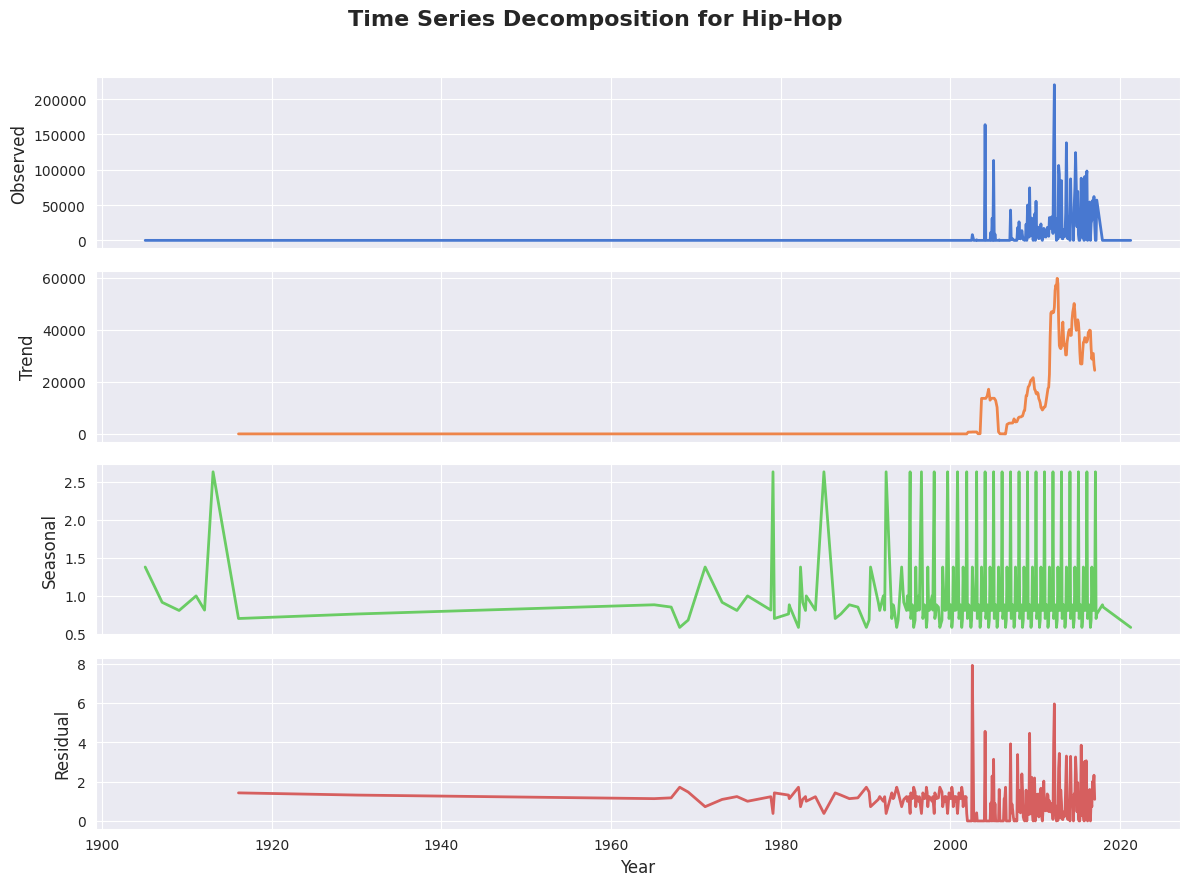

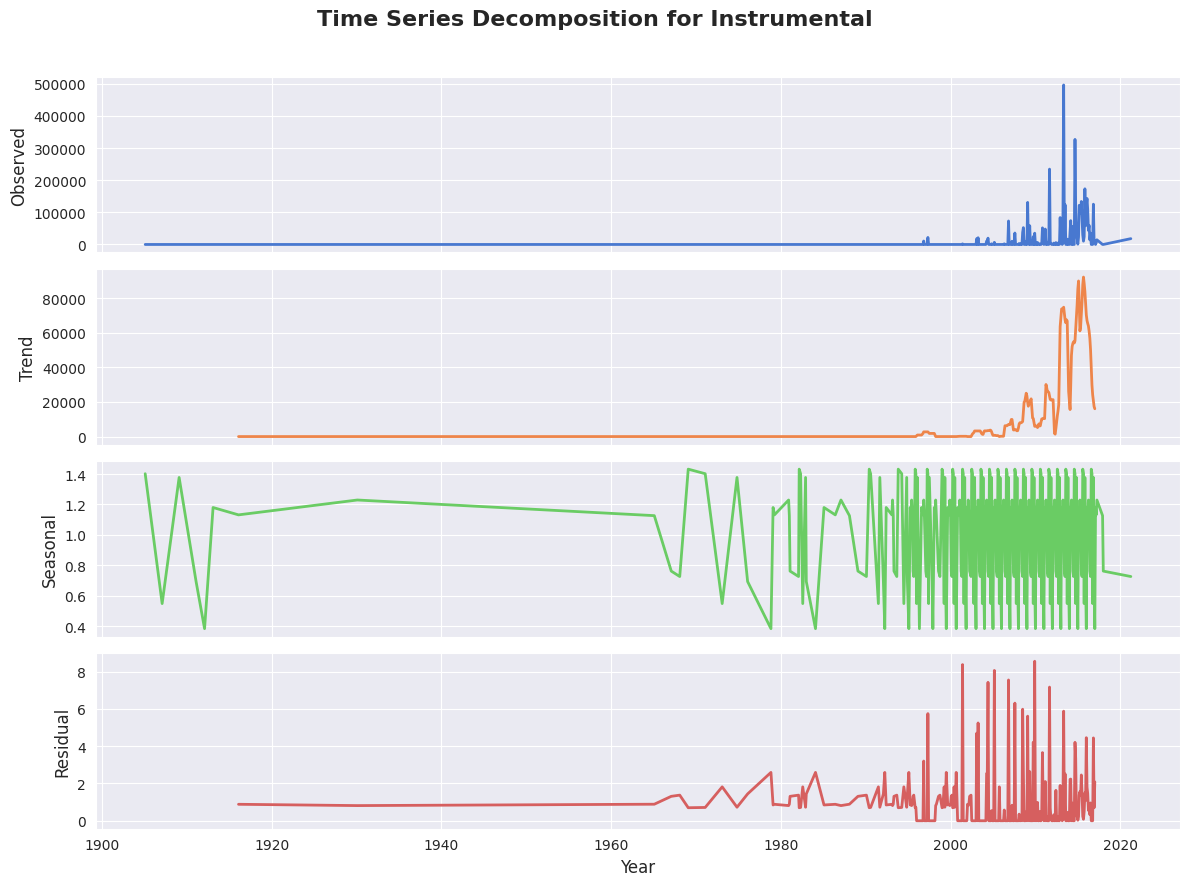

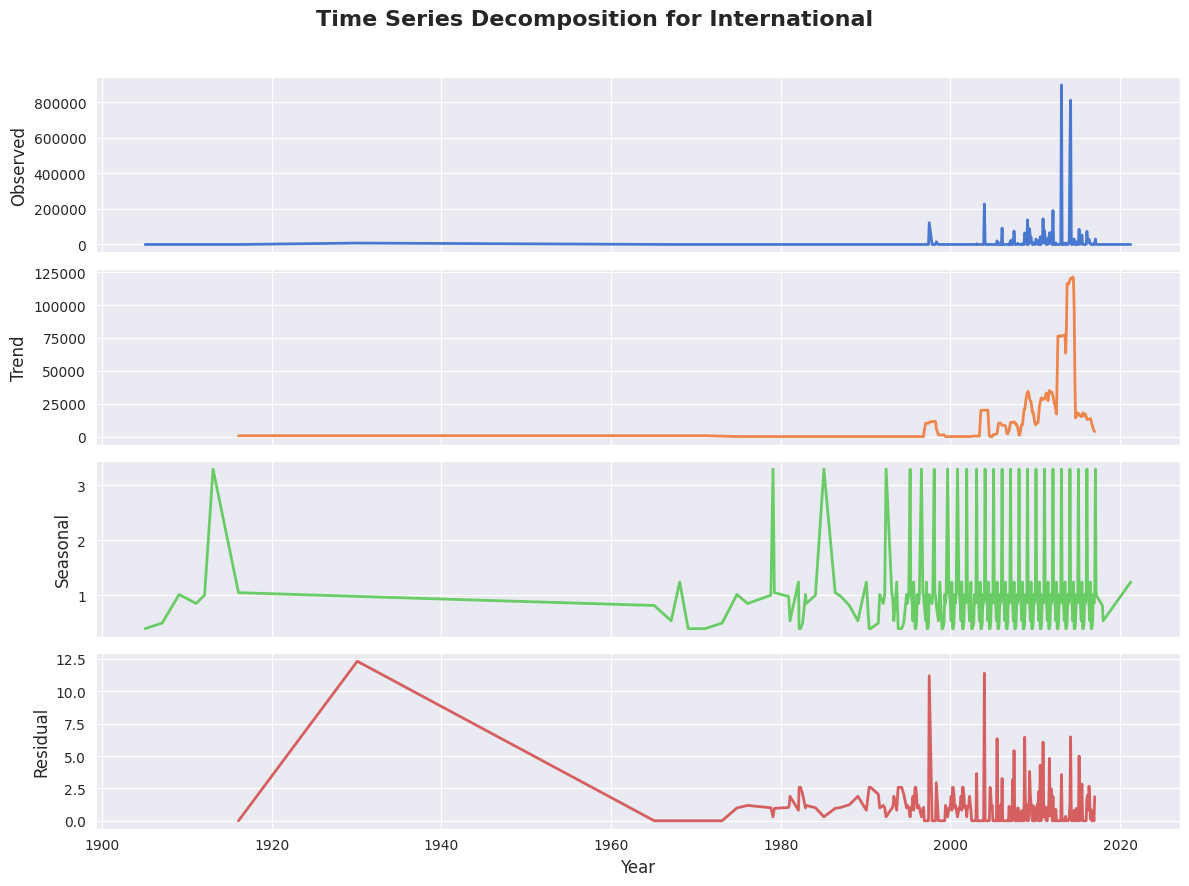

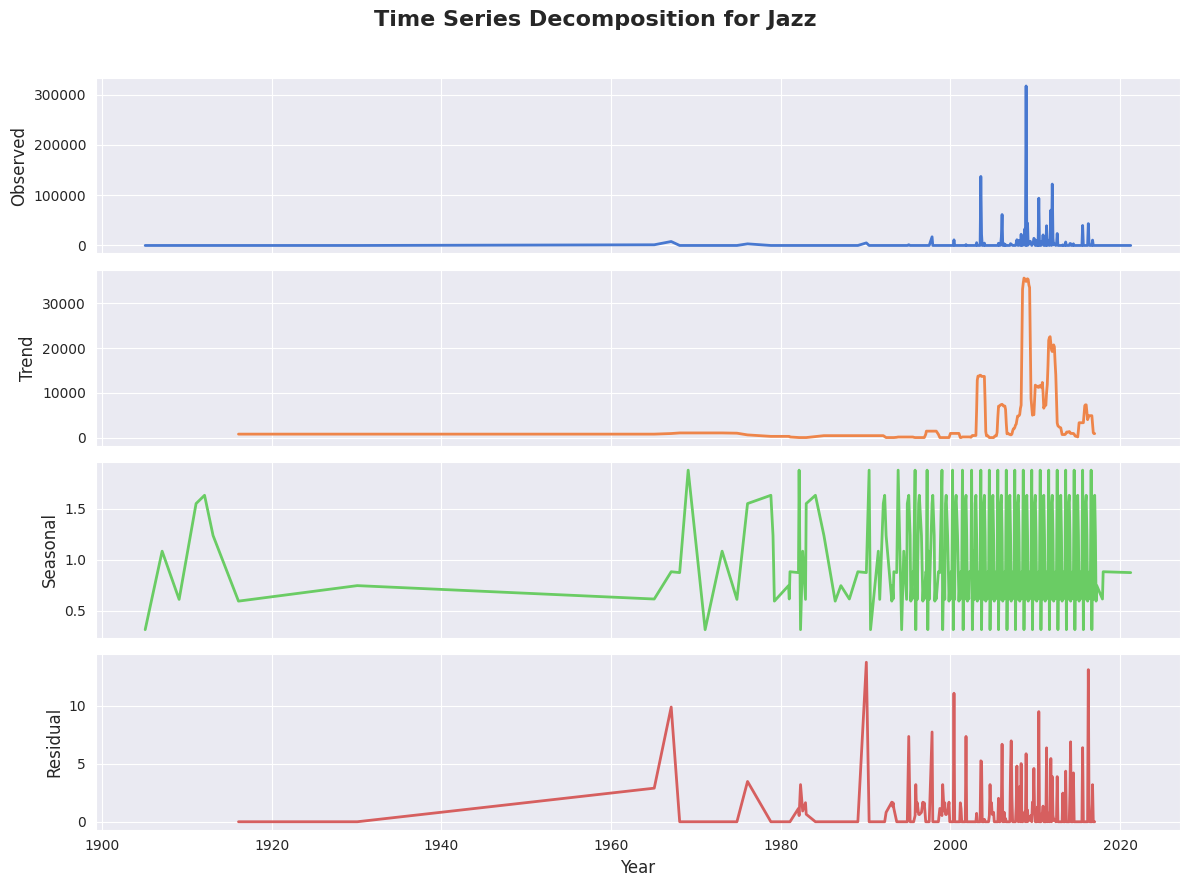

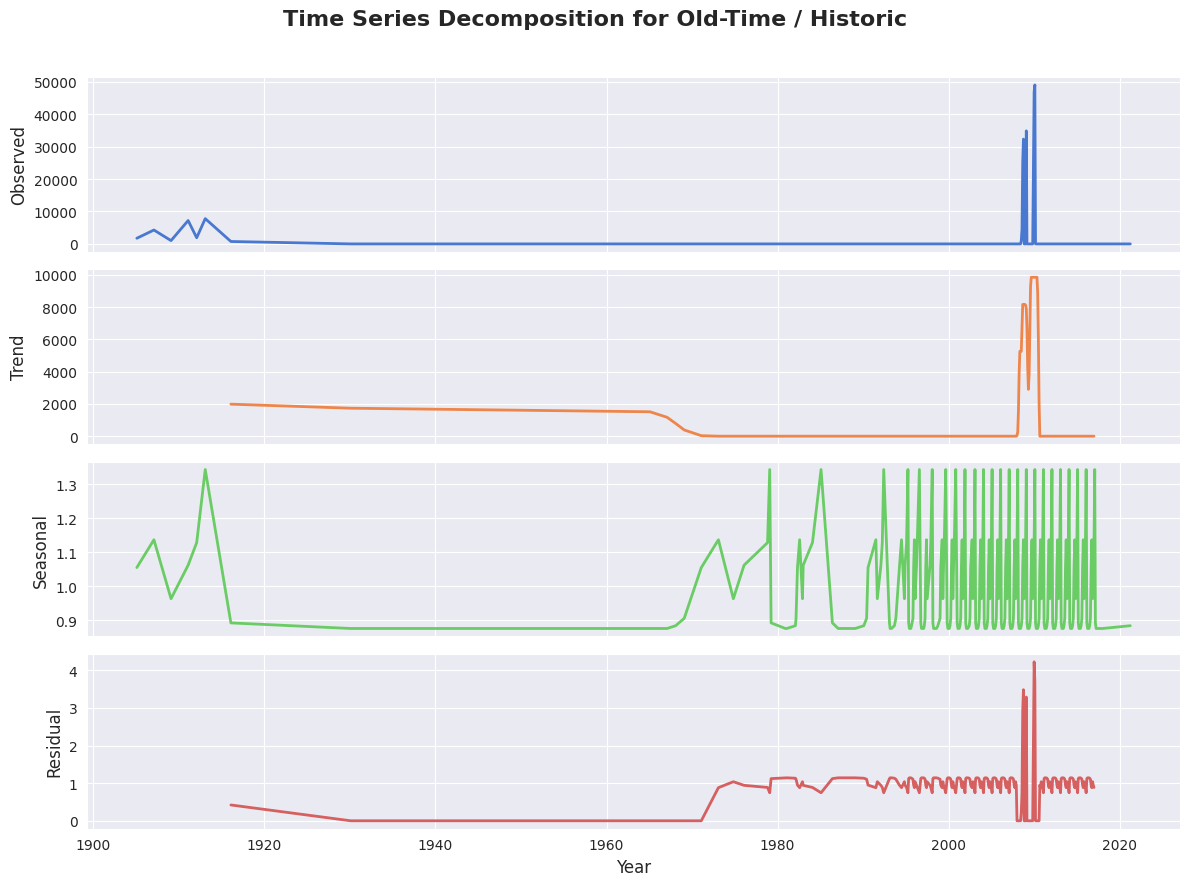

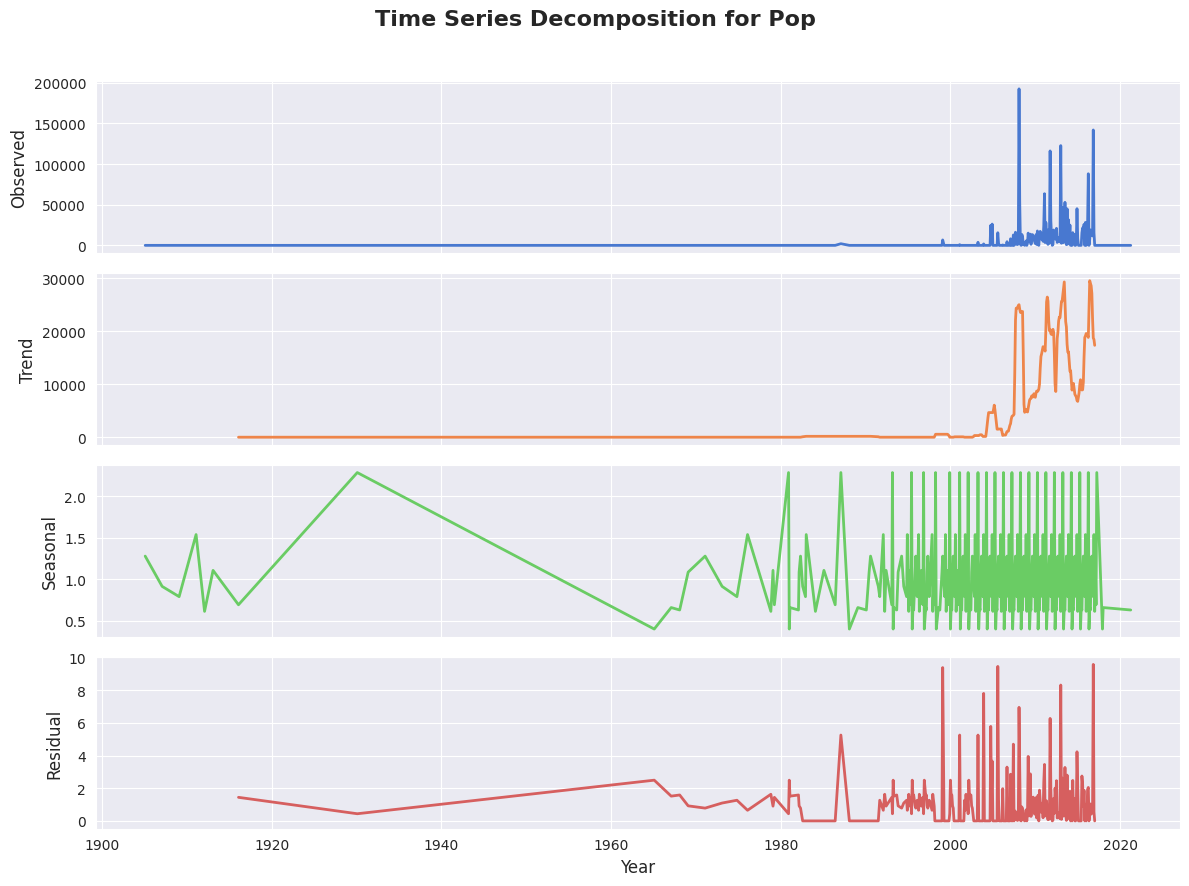

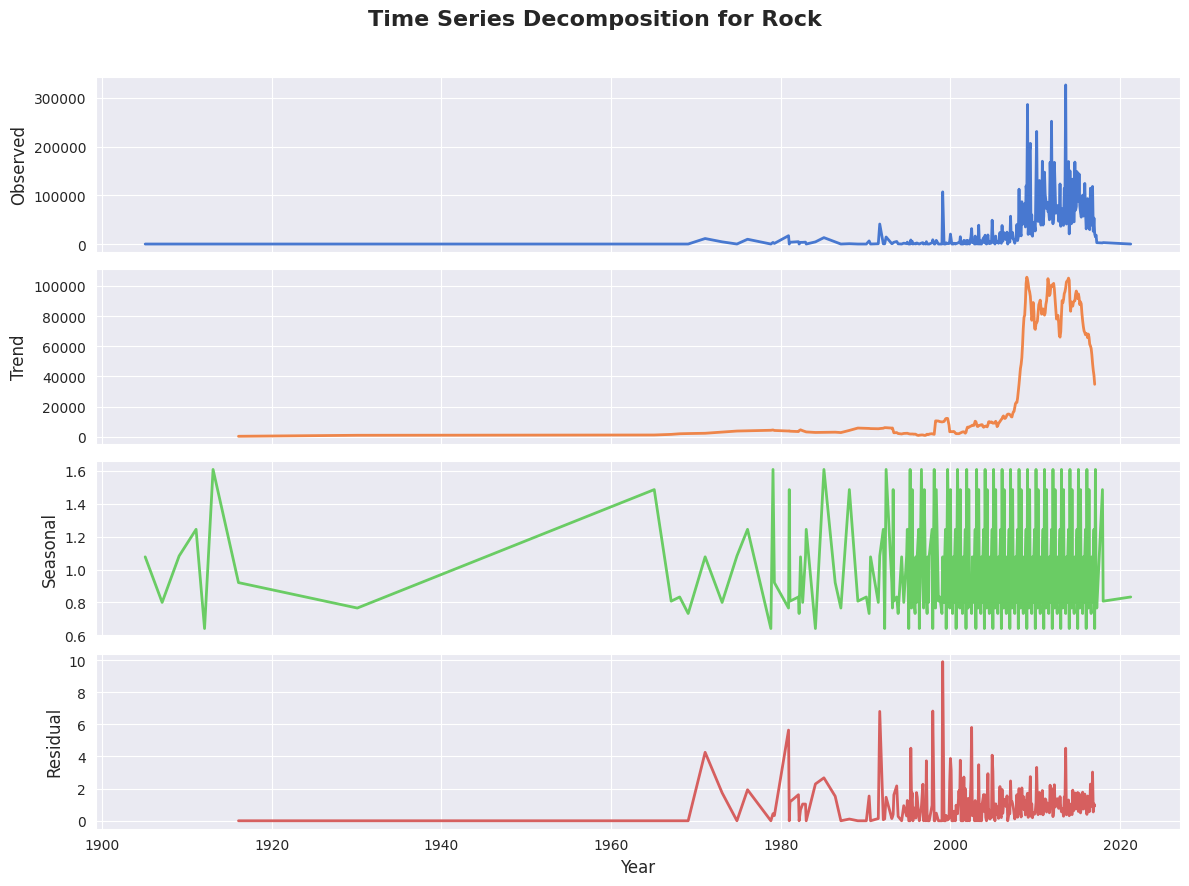

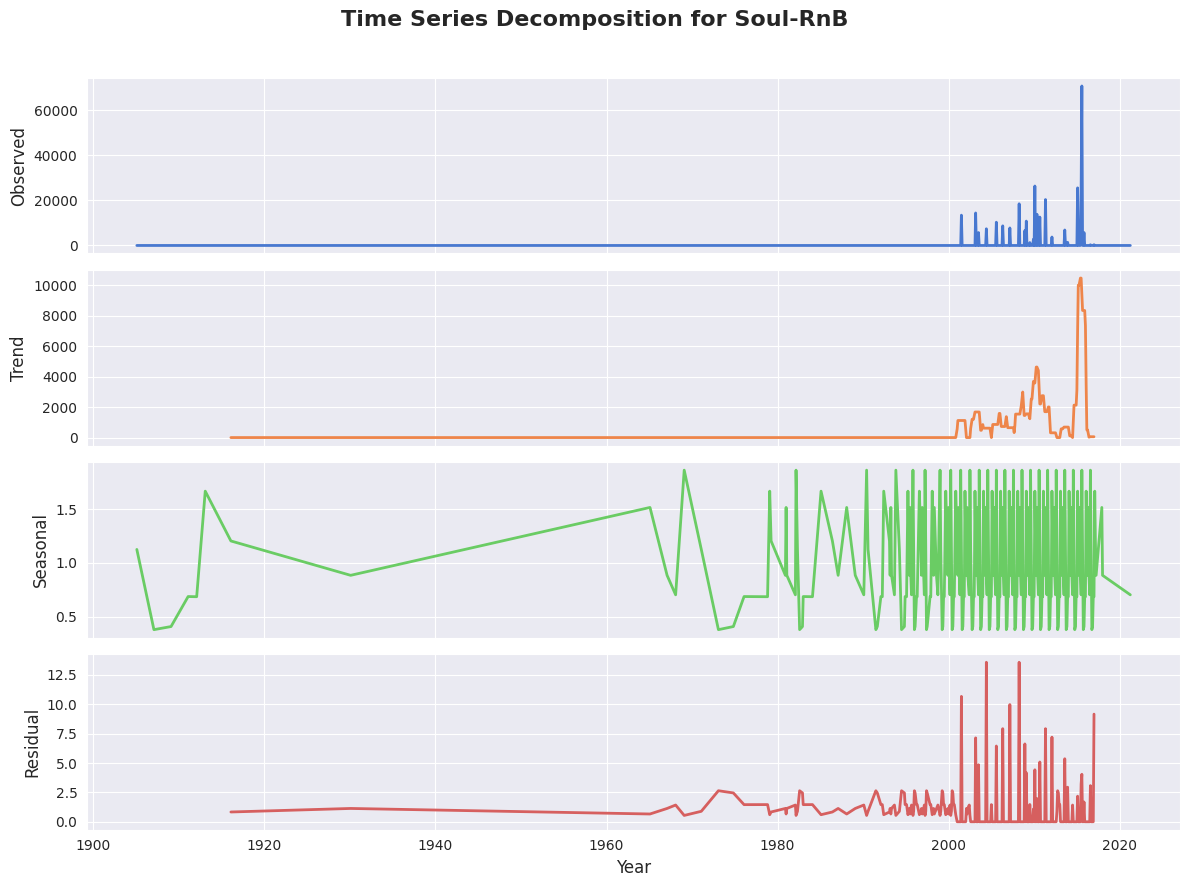

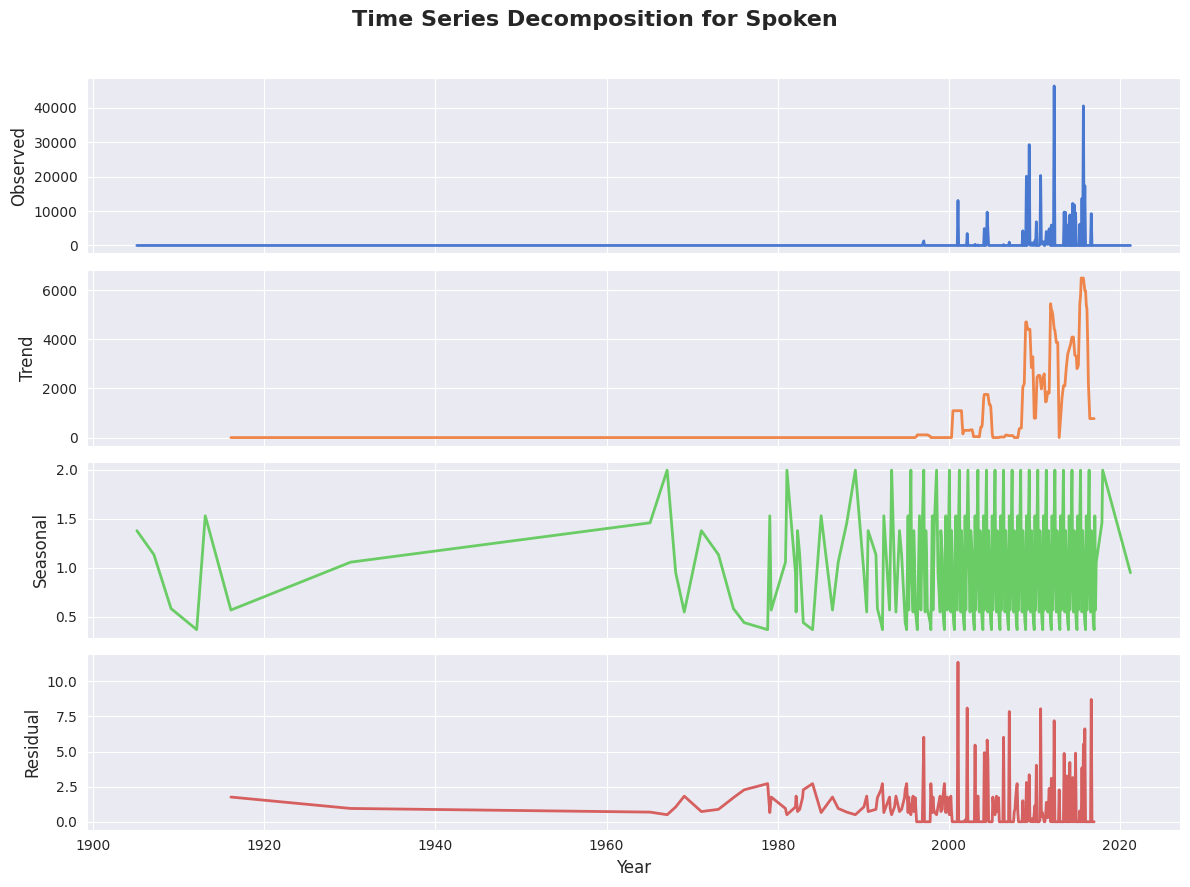

In [ ]:
# time series decomposition

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set_style("darkgrid")
genre_data_fixed = genre_data.copy()
genre_data_fixed[genre_data_fixed == 0] = 1e-6  # replace zeros with very small value so we can do multiplicative

# color palette
colors = sns.color_palette("muted", 4)

# loop through each genre and make plots
for genre in genre_data_fixed.columns:
    result = seasonal_decompose(genre_data_fixed[genre], model='multiplicative', period=12)

    fig, axes = plt.subplots(4, 1, figsize=(12, 9), sharex=True)

    # observed data plot
    axes[0].plot(result.observed, color=colors[0], linewidth=2)
    axes[0].set_ylabel("Observed", fontsize=12)

    # trend plot
    axes[1].plot(result.trend, color=colors[1], linewidth=2)
    axes[1].set_ylabel("Trend", fontsize=12)

    # seasonality plot
    axes[2].plot(result.seasonal, color=colors[2], linewidth=2)
    axes[2].set_ylabel("Seasonal", fontsize=12)

    # residual plot
    axes[3].plot(result.resid, color=colors[3], linewidth=2)
    axes[3].set_ylabel("Residual", fontsize=12)

    fig.suptitle(f"Time Series Decomposition for {genre}", fontsize=16, fontweight='bold')
    plt.xlabel("Year", fontsize=12)
    plt.xticks(fontsize=10)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout
    plt.show()
